In [2]:
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



import warnings
warnings.filterwarnings('ignore')

            date  temperature
0     01/01/2009    -6.810629
1     02/01/2009    -3.360486
2     03/01/2009     5.435694
3     04/01/2009     7.283889
4     05/01/2009    12.690069
...          ...          ...
2918  28/12/2016     4.887153
2919  29/12/2016     2.676250
2920  30/12/2016    -1.706597
2921  31/12/2016    -2.492500
2922  01/01/2017    -4.820000

[2923 rows x 2 columns]


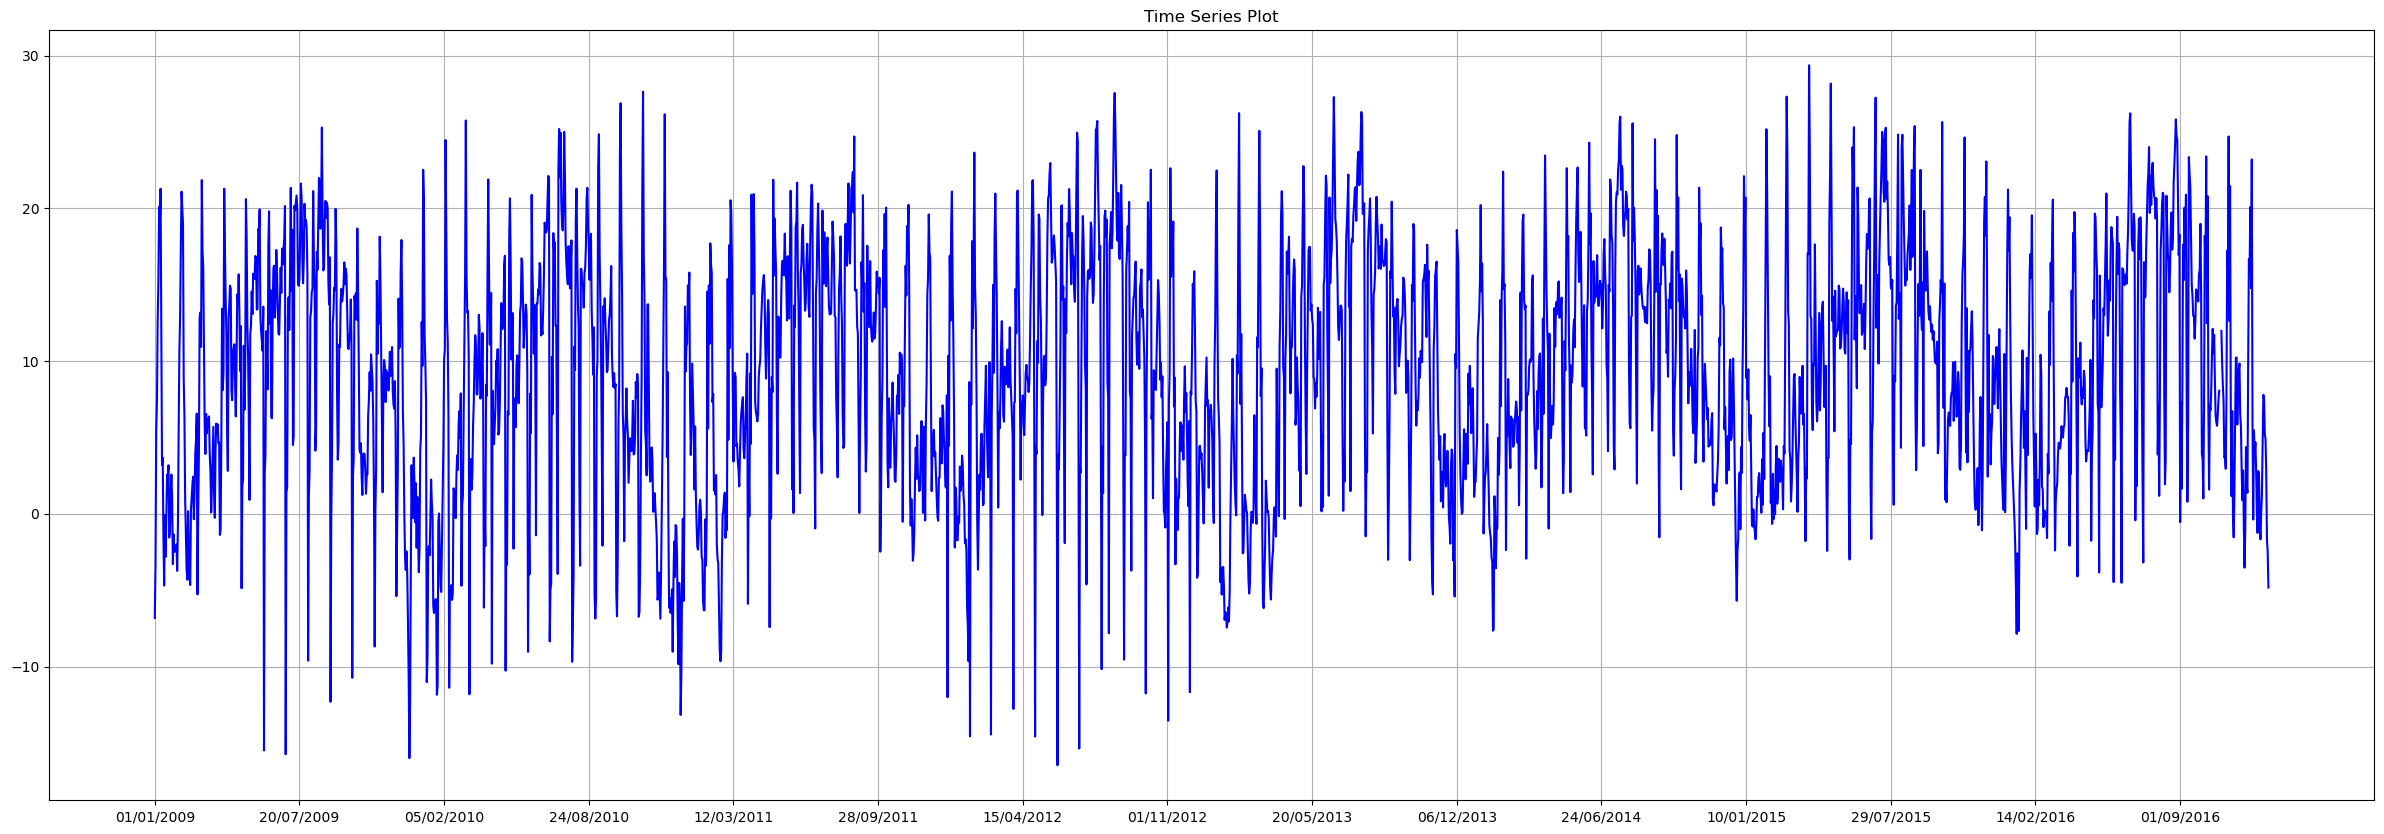

In [3]:
df = pd.read_csv('daily_weather.csv')

print(df)

df.set_index('date', inplace=True)

plt.figure(figsize=(30, 10))
plt.plot(df.index, df, linestyle='-', color='b')  # Replace 'your_data_column' with the actual column name
plt.title('Time Series Plot')
plt.grid(True)

# Set x-axis ticks at regular intervals, for example, every 100 days
tick_interval = 200
plt.xticks(df.index[::tick_interval])

plt.show()

In [4]:
# Infer the frequency
inferred_freq = pd.infer_freq(df.index)

print(inferred_freq)


#df = df.asfreq('D')  # Assuming daily frequency, adjust as needed

print(df['temperature'])

None
date
01/01/2009    -6.810629
02/01/2009    -3.360486
03/01/2009     5.435694
04/01/2009     7.283889
05/01/2009    12.690069
                ...    
28/12/2016     4.887153
29/12/2016     2.676250
30/12/2016    -1.706597
31/12/2016    -2.492500
01/01/2017    -4.820000
Name: temperature, Length: 2923, dtype: float64


## Frequência do index é Diária (daily)

Rows with missing values:
            temperature
date                   
26/10/2016          NaN
27/10/2016          NaN


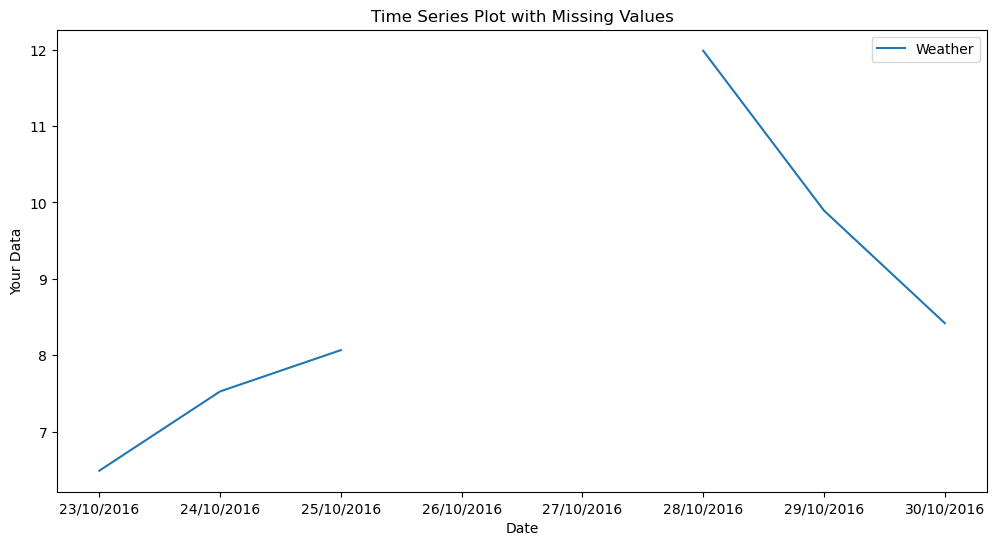

In [5]:
# ex4 

#print(df.isnull())

# Find rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_missing)

# Identify rows with missing values on 26/10/2016 and 27/10/2016
missing_rows = df[df.isnull().any(axis=1)]

# Define the time interval
start_date = '23/10/2016'
end_date = '30/10/2016'

# Plot the relevant portion of the time series
plt.figure(figsize=(12, 6))
plt.plot(df[start_date:end_date].index, df[start_date:end_date], label='Weather')
plt.title('Time Series Plot with Missing Values')
plt.xlabel('Date')
plt.ylabel('Your Data')
plt.legend()
plt.show()




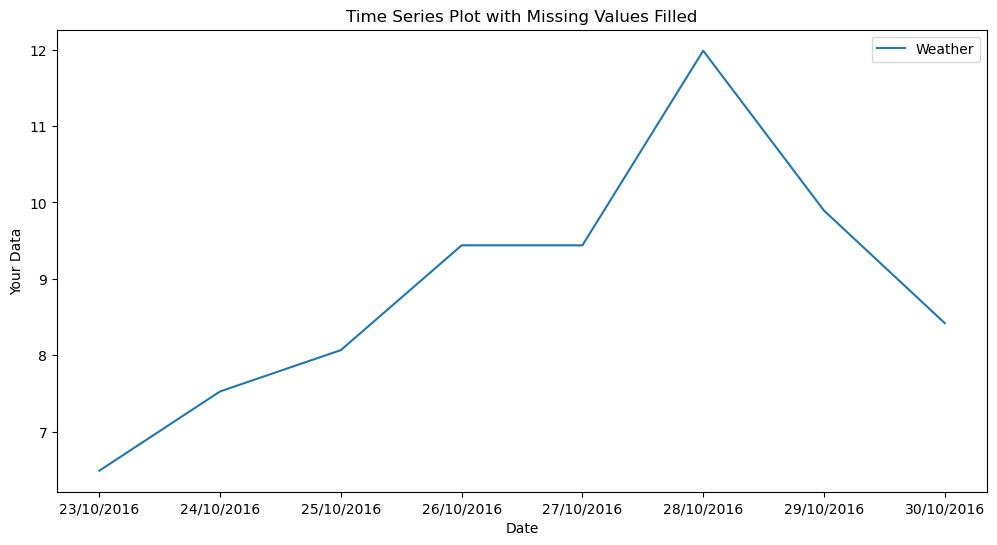

In [6]:
#let's fill the missing values

df_filled = df.fillna(df.mean())

# Define the time interval
start_date = '23/10/2016'
end_date = '30/10/2016'

# Plot the relevant portion of the time series
plt.figure(figsize=(12, 6))
plt.plot(df_filled[start_date:end_date].index, df_filled[start_date:end_date], label='Weather')
plt.title('Time Series Plot with Missing Values Filled')
plt.xlabel('Date')
plt.ylabel('Your Data')
plt.legend()
plt.show()



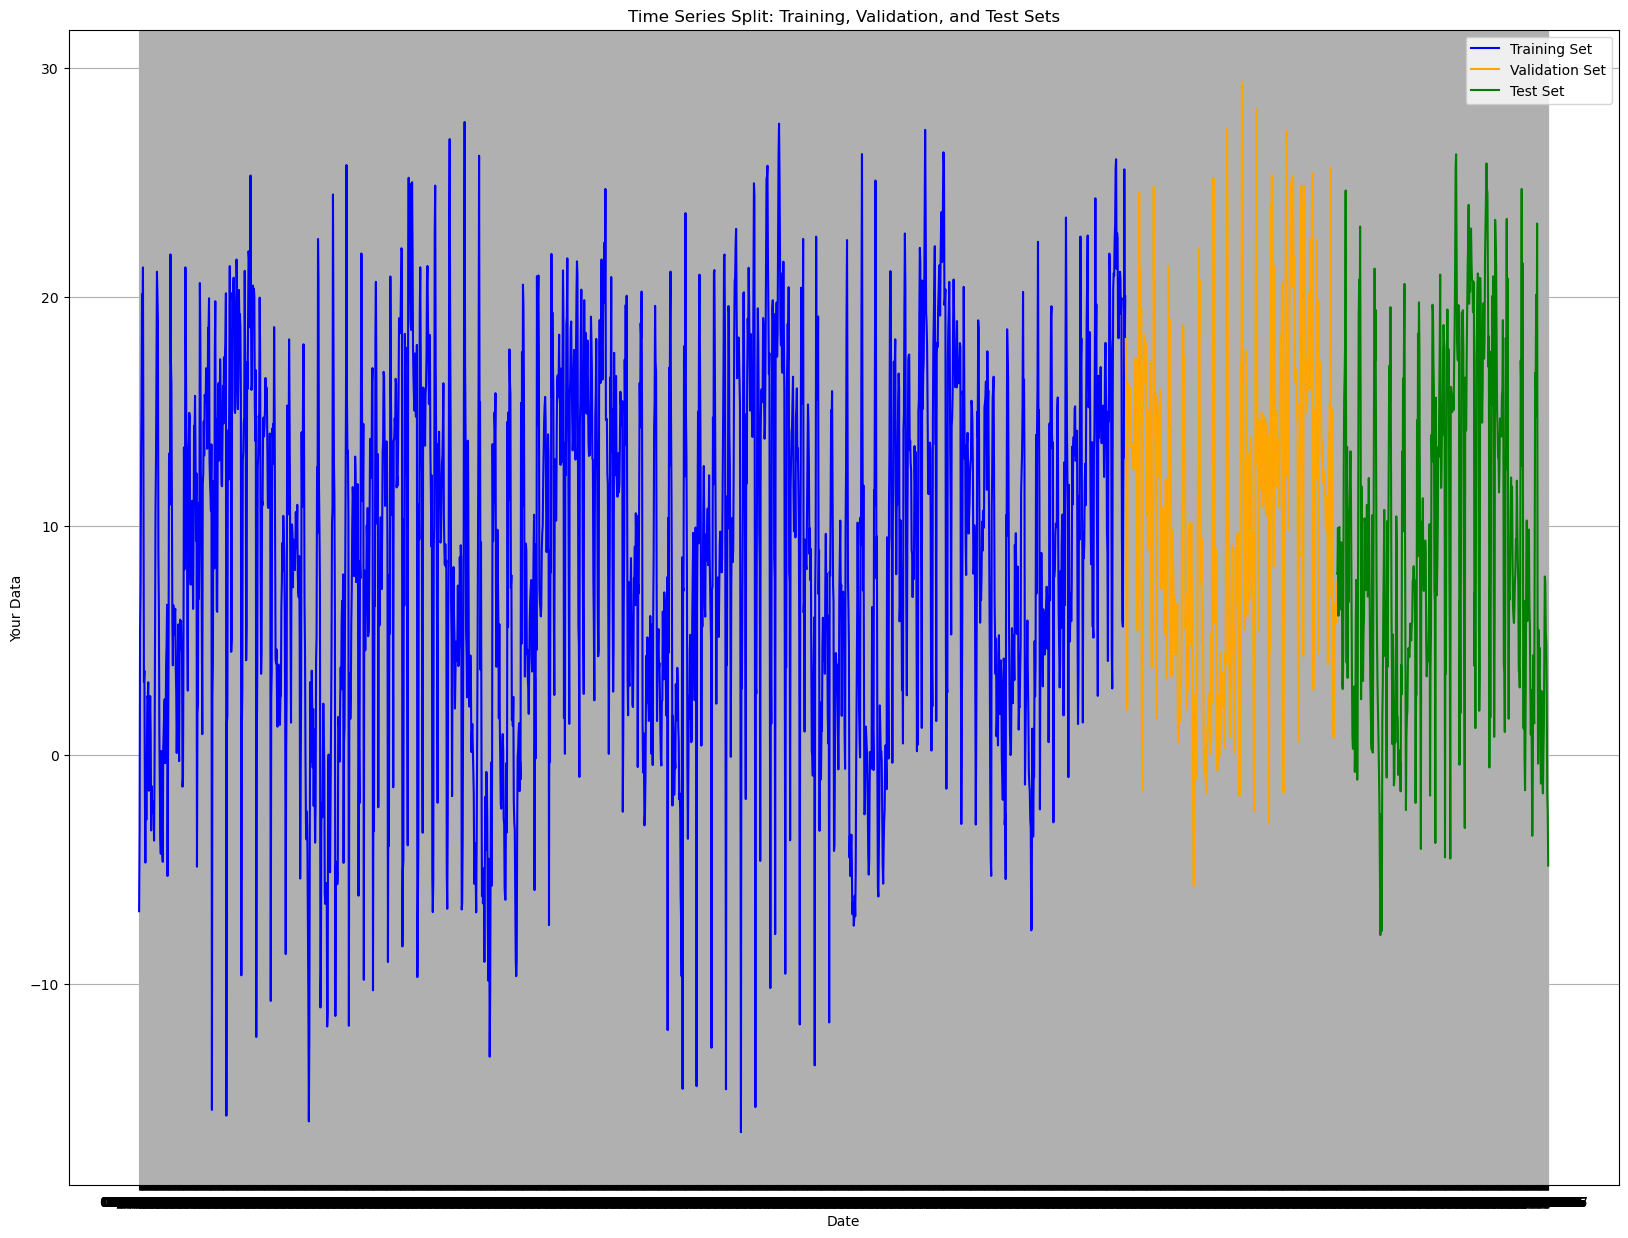

In [7]:
#ex4 let's split the data into train, validation and test sets

# Calculate the split points
total_samples = len(df_filled)
train_split = int(0.7 * total_samples)
val_split = int(0.85 * total_samples)

# Split the data
train_set = df_filled.iloc[:train_split]
val_set = df_filled.iloc[train_split:val_split]
test_set = df_filled.iloc[val_split:]

# Display the shapes of the resulting sets visualy
plt.figure(figsize=(20, 15))
# Plot the training set
plt.plot(train_set, label='Training Set', linestyle='-', color='blue')

# Plot the validation set
plt.plot(val_set, label='Validation Set', linestyle='-', color='orange')

# Plot the test set
plt.plot(test_set, label='Test Set', linestyle='-', color='green')

# Customize the plot
plt.title('Time Series Split: Training, Validation, and Test Sets')
plt.xlabel('Date')
plt.ylabel('Your Data')
plt.legend()
plt.grid(True)



plt.show()



In [8]:
#ex5 - let's scale our data

scaler = MinMaxScaler()

train_set_scaled = scaler.fit(train_set)
val_set_scaled = scaler.fit(val_set)
test_set_scaled = scaler.fit(test_set)

In [9]:
#ex6 - Transform  your  time  series  to  contain  n=6  independent 
#and  m=1  dependent  variable  using  the slideWindow function


